# Capstone - Step2: Data Wrangling and Exploration
<hr style="border:2px solid #007700;">


## Source: **BRAZIL DATA CUBE (BDC)**

Brazil Data Cube is a research, development and technological innovation project of the National Institute for Space Research (INPE), Brazil. It is producing data sets from big volumes of medium-resolution remote sensing images for the entire national territory and developing a computational platform to process and analyze these data sets using artificial intelligence, machine learning and image time series analysis.

Brazil Data Cube is part of the “Environmental Monitoring of Brazilian Biomes project“, funded by the Amazon Fund through the financial collaboration of the Brazilian Development Bank (BNDES) and the Foundation for Science, Technology and Space Applications (FUNCATE) no. 17.2.0536.1 .

source: https://data.inpe.br/bdc/web/en/home-page-2/

<hr style="border:2px solid #007700;">

### **Introduction**



The two most suitable image collection from BDC (Brazil Data Cube) for detection are:

**Sentinel-2 – MSI – Level-2A** 
    
        - 10-meter spatial resolution, which is detailed enough to detect medium to large solar installations.
        - Surface reflectance data, corrected for atmospheric effects, improving the accuracy of your machine learning model.
        - Free and regular access, with a revisit time of 5 days.

**Sentinel-2 – MSI – Level-1C** 
        
        - processed dataset. 
        - It would need an atmospheric correction.



### Data Access:


In [7]:
import pystac_client

In [8]:
pystac_client.__version__

'0.8.3'

In [9]:
service = pystac_client.Client.open('https://data.inpe.br/bdc/stac/v1/')

In [10]:
collection = service.get_collection('S2-16D-2')
collection

<CollectionClient id=S2-16D-2>

### Region of Interest (ROI)


We define a boundary box for the data access and extraction

In [94]:
from geopy.distance import geodesic

# Define de ROI bbox

center_point = (-15.753758452903798, -47.7330090496202)

# Define the distance to extend
distance_km = 1.5

# Calculate the boundary box
bb_north = geodesic(kilometers=distance_km).destination(center_point, 0).latitude
bb_south = geodesic(kilometers=distance_km).destination(center_point, 180).latitude
bb_east = geodesic(kilometers=distance_km).destination(center_point, 90).longitude
bb_west = geodesic(kilometers=distance_km).destination(center_point, 270).longitude
bbox = (bb_west, bb_south, bb_east, bb_north)

print(f"Bounding box:\nSouth: {bb_south} \tWest: {bb_west}\nNorth: {bb_north} \tEast: {bb_east}")
print(f"bbox = {bbox}")

Bounding box:
South: -15.767313946577834 	West: -47.747006223606235
North: -15.7402029423913 	East: -47.719011875634166
bbox = (-47.747006223606235, -15.767313946577834, -47.719011875634166, -15.7402029423913)


Sentinel

In [53]:
item_search = service.search(bbox=bbox,
                             datetime='2023-08-31/2024-08-31',
                             collections=['S2-16D-2'])
item_search

In [55]:
print(f'number of images in the collection: {item_search.matched()}')

number of images in the collection: 23


To iterate over the matched result, use .get_items() to traverse the list of items:


In [58]:
for item in item_search.items():
    print(item)

<Item id=S2-16D_V2_028022_20240812>
<Item id=S2-16D_V2_028022_20240727>
<Item id=S2-16D_V2_028022_20240711>
<Item id=S2-16D_V2_028022_20240625>
<Item id=S2-16D_V2_028022_20240609>
<Item id=S2-16D_V2_028022_20240524>
<Item id=S2-16D_V2_028022_20240508>
<Item id=S2-16D_V2_028022_20240422>
<Item id=S2-16D_V2_028022_20240406>
<Item id=S2-16D_V2_028022_20240321>
<Item id=S2-16D_V2_028022_20240305>
<Item id=S2-16D_V2_028022_20240218>
<Item id=S2-16D_V2_028022_20240202>
<Item id=S2-16D_V2_028022_20240117>
<Item id=S2-16D_V2_028022_20240101>
<Item id=S2-16D_V2_028022_20231219>
<Item id=S2-16D_V2_028022_20231203>
<Item id=S2-16D_V2_028022_20231117>
<Item id=S2-16D_V2_028022_20231101>
<Item id=S2-16D_V2_028022_20231016>
<Item id=S2-16D_V2_028022_20230930>
<Item id=S2-16D_V2_028022_20230914>
<Item id=S2-16D_V2_028022_20230829>


In [60]:
assets = item.assets
print("These are the available bands for item:")
for k in assets.keys():
    print(k)

These are the available bands for item:
B01
B02
B03
B04
B05
B06
B07
B08
B09
B11
B12
B8A
EVI
NBR
SCL
NDVI
CLEAROB
TOTALOB
thumbnail
PROVENANCE


The metadata related to the Sentinel-2/MSI blue band is available under the dictionary key B02:

In [62]:
blue_asset = assets['B02']
blue_asset

<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/028/022/2023/08/29/S2-16D_V2_028022_20230829_B02.tif>

All the images

In [64]:
for asset in assets.values():
    print(asset)

<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/028/022/2023/08/29/S2-16D_V2_028022_20230829_B01.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/028/022/2023/08/29/S2-16D_V2_028022_20230829_B02.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/028/022/2023/08/29/S2-16D_V2_028022_20230829_B03.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/028/022/2023/08/29/S2-16D_V2_028022_20230829_B04.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/028/022/2023/08/29/S2-16D_V2_028022_20230829_B05.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/028/022/2023/08/29/S2-16D_V2_028022_20230829_B06.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/028/022/2023/08/29/S2-16D_V2_028022_20230829_B07.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/028/022/2023/08/29/S2-16D_V2_028022_20230829_B08.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/028/022/2023/08/29/S2-16D_V2_028022_20230829_B09.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-1

These images are uploaded in the repo

# Using RasterIO and NumPy to visualize the images
<hr style="border:1px solid #007700;">

We have implemented a basic `read` method that allows to retrieve part of an image according to a rectangle specified in `EPSG:4326` (latitude and longitude).

In [76]:
#import rasterio
from rasterio.crs import CRS
from rasterio.warp import transform
from rasterio.windows import from_bounds

def read(uri: str, bbox: list, masked: bool = True, crs: str = None):
    """Read raster window as numpy.ma.masked_array."""
    source_crs = CRS.from_string('EPSG:4326')
    if crs:
        source_crs = CRS.from_string(crs)

    # Expects the bounding box has 4 values
    w, s, e, n = bbox
        
    with rasterio.open(uri) as dataset:
        transformer = transform(source_crs, dataset.crs, [w, e], [s, n])
        window = from_bounds(transformer[0][0], transformer[1][0], 
                             transformer[0][1], transformer[1][1], dataset.transform)
        return dataset.read(1, window=window, masked=masked)

In [78]:
red = read(item.assets['B04'].href, bbox=bbox)

In [79]:
green = read(item.assets['B03'].href, bbox=bbox)

In [80]:
blue = read(item.assets['B02'].href, bbox=bbox)

In [96]:
nir = read(item.assets['B08'].href, bbox=bbox)

In [149]:
evi = read(item.assets['EVI'].href, bbox=bbox)

In [84]:
red.shape, green.shape, blue.shape

((297, 303), (297, 303), (297, 303))

In [88]:
import numpy as np
np.sum(red.mask), np.sum(green.mask), np.sum(blue.mask)

(0, 0, 0)

In [90]:
from matplotlib import pyplot as plt

In [136]:
def print_imageBand_hist(band, bandname):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # plot the image from the band
    ax[0].imshow(band, cmap='gray')
    ax[0].set_title(bandname)
        
    valid_data = band.compressed()

    # plot the histogram
    ax[1].hist(valid_data, bins=200, color='blue', edgecolor='black')
    ax[1].set_title(f'Histogram of {bandname} Data')
    ax[1].set_xlabel('Pixel Values')
    ax[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

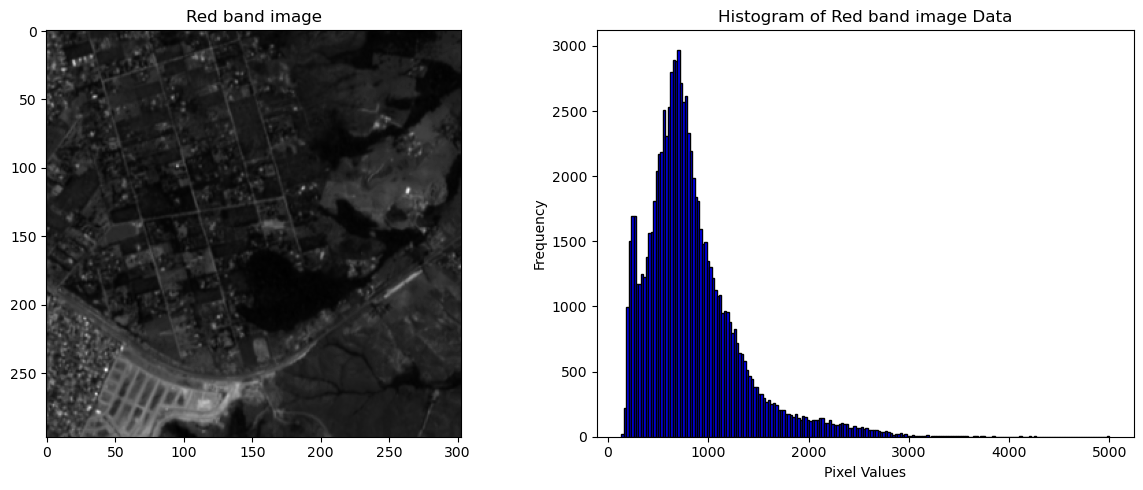

In [138]:
print_imageBand_hist(red, 'Red band image')

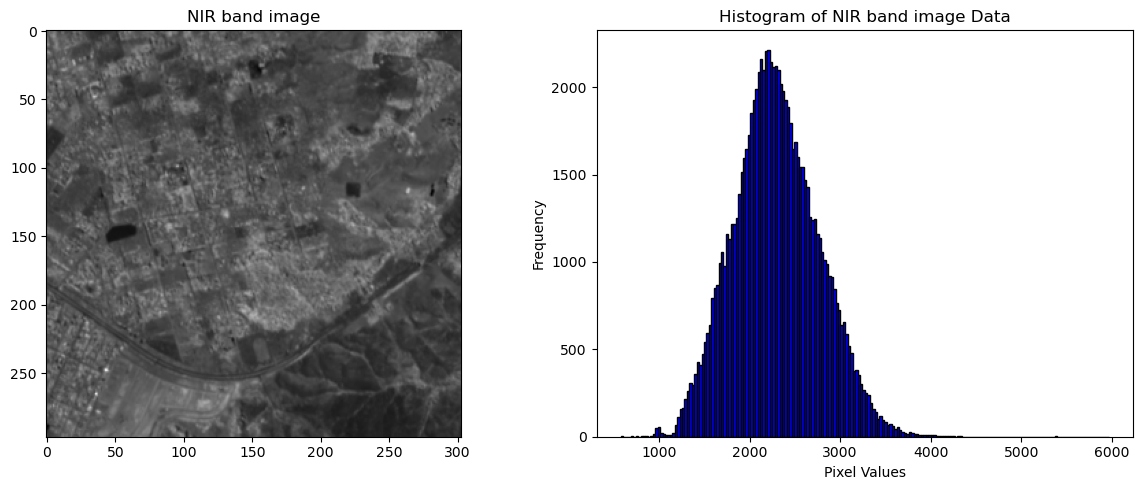

In [147]:
print_imageBand_hist(nir, 'NIR band image')

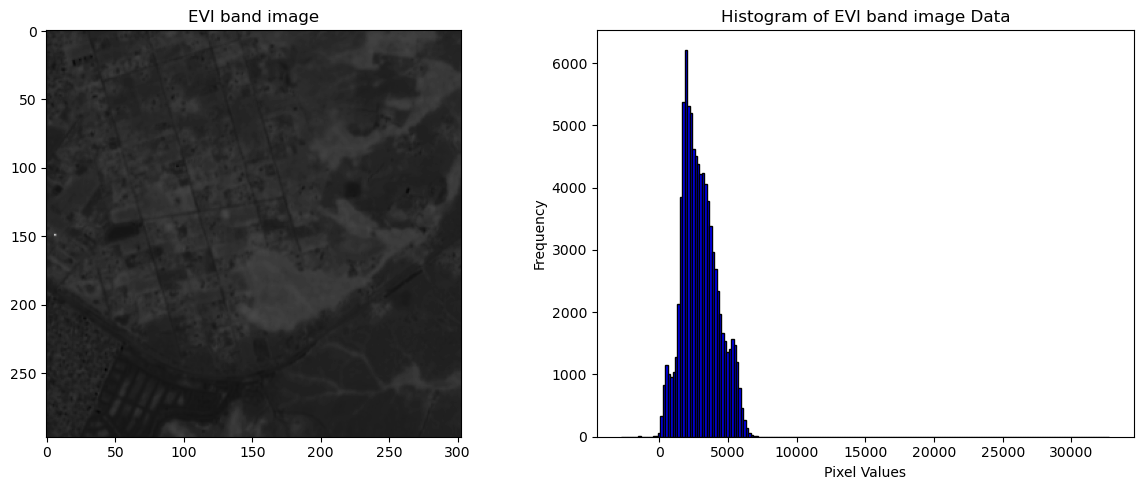

In [151]:
print_imageBand_hist(evi, 'EVI band image')

Now, let's combine the red, green and blue image bands.

In [153]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

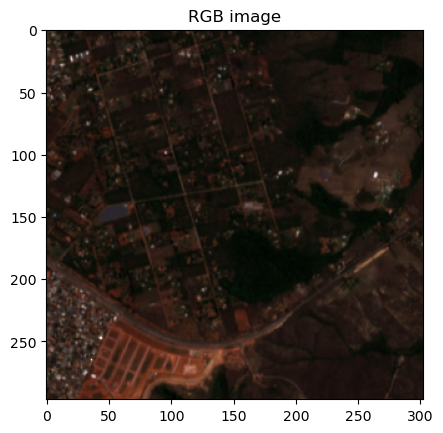

In [184]:
# np.dstack: takes three 2D arrays (the red, green, and blue channels), each representing a grayscale image, and stacks them to form a 3D RGB image.
rgb = np.dstack((normalize(red), normalize(green), normalize(blue)))
plt.title("RGB image")
plt.imshow(rgb)

# Retrieving Image Files
<hr style="border:1px solid #007700;">

The files related to an asset can be retrieved through the download method. The cell code below shows how to download the image file associated to the asset into a folder named img:

In [191]:
import os
from urllib.parse import urlparse

import requests
from pystac import Asset
from tqdm import tqdm

def download(asset: Asset, directory: str = None, chunk_size: int = 1024 * 16, **request_options) -> str:
    """Smart download STAC Item asset.
    This method uses a checksum validation and a progress bar to monitor download status.
    """
    if directory is None:
        directory = 'E:\tmp'

    response = requests.get(asset.href, stream=True, **request_options)
    output_file = os.path.join(directory, urlparse(asset.href)[2].split('/')[-1])
    os.makedirs(directory, exist_ok=True)
    total_bytes = int(response.headers.get('content-length', 0))
    with tqdm.wrapattr(open(output_file, 'wb'), 'write', miniters=1, total=total_bytes, desc=os.path.basename(output_file)) as fout:
        for chunk in response.iter_content(chunk_size=chunk_size):
            fout.write(chunk)

In [193]:
#for asset in assets.values():
#    download(asset, 'BCD_images')

S2-16D_V2_028022_20230829_B01.tif: 100%|████████████████████████████████████████████| 147M/147M [00:27<00:00, 5.54MB/s]
S2-16D_V2_028022_20230829_B02.tif: 100%|████████████████████████████████████████████| 196M/196M [00:17<00:00, 11.5MB/s]
S2-16D_V2_028022_20230829_B03.tif: 100%|████████████████████████████████████████████| 202M/202M [00:25<00:00, 8.37MB/s]
S2-16D_V2_028022_20230829_B04.tif: 100%|████████████████████████████████████████████| 214M/214M [00:22<00:00, 9.98MB/s]
S2-16D_V2_028022_20230829_B05.tif: 100%|████████████████████████████████████████████| 208M/208M [00:19<00:00, 11.0MB/s]
S2-16D_V2_028022_20230829_B06.tif: 100%|████████████████████████████████████████████| 210M/210M [00:23<00:00, 9.50MB/s]
S2-16D_V2_028022_20230829_B07.tif: 100%|████████████████████████████████████████████| 213M/213M [00:17<00:00, 12.5MB/s]
S2-16D_V2_028022_20230829_B08.tif: 100%|████████████████████████████████████████████| 218M/218M [00:28<00:00, 8.03MB/s]
S2-16D_V2_028022_20230829_B09.tif: 100%|

The **W**eb **T**ime **S**eries **S**ervice (WTSS) is a lightweight web service for handling time series data from remote sensing imagery. Given a location and a time interval you can retrieve the according time series as a list of real values.


In WTSS a coverage is a three dimensional array associated to spatial and temporal reference systems.

WTSS is based on three operations:

- ``list_coverages``: returns the list of all available coverages in the service.

- ``describe_coverage``: returns the metadata of a given coverage.

- ``time_series``: query the database for the list of values for a given location and time interval.




This service is composed by three operations:

<div align="center">
    <figcaption><strong></strong>WTSS Operations</figcaption>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/wtss-operations.png?raw=true" align="center" width="768"/>
    <br>
    <strong>Source</strong>: Adapted from <i>et al.</i> (2017)
</div>


WTSS documentation available on: https://wtss.readthedocs.io/en/latest/class_wtss.html

<hr style="border:1px solid #007700;">